In [4]:
import pandas as pd
from google.colab import files

# Upload the Excel file to Google Colab
uploaded = files.upload()



Saving laptopPrice.xlsx to laptopPrice.xlsx


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor


In [5]:
# Assuming your Excel file is named 'data.xlsx', read it into a DataFrame
# Change the file name as per your Excel file
df = pd.read_excel('laptopPrice.xlsx')



In [6]:
df.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   brand              823 non-null    object
 1   processor_brand    823 non-null    object
 2   processor_name     823 non-null    object
 3   processor_gnrtn    823 non-null    object
 4   ram_gb             823 non-null    object
 5   ram_type           823 non-null    object
 6   ssd                823 non-null    object
 7   hdd                823 non-null    object
 8   os                 823 non-null    object
 9   os_bit             823 non-null    object
 10  graphic_card_gb    823 non-null    object
 11  weight             823 non-null    object
 12  warranty           823 non-null    object
 13  Touchscreen        823 non-null    object
 14  msoffice           823 non-null    object
 15  Price              823 non-null    int64 
 16  rating             823 non-null    object
 1

In [8]:
df.isnull().sum()

brand                0
processor_brand      0
processor_name       0
processor_gnrtn      0
ram_gb               0
ram_type             0
ssd                  0
hdd                  0
os                   0
os_bit               0
graphic_card_gb      0
weight               0
warranty             0
Touchscreen          0
msoffice             0
Price                0
rating               0
Number of Ratings    0
Number of Reviews    0
dtype: int64

In [9]:
df.describe()

,Price,Number of Ratings,Number of Reviews
count,823.000000,823.000000,823.000000
mean,76745.177400,315.301337,37.609964
std,45101.790525,1047.382654,121.728017
min,16990.000000,0.000000,0.000000
25%,46095.000000,0.000000,0.000000
50%,64990.000000,17.000000,2.000000
75%,89636.000000,139.500000,18.000000
max,441990.000000,15279.000000,1947.000000


In [10]:
#Add the exchange rate from Indian Rupees to USD
df['Price'] = df['Price']*0.012

In [11]:
#Dataset Visualization

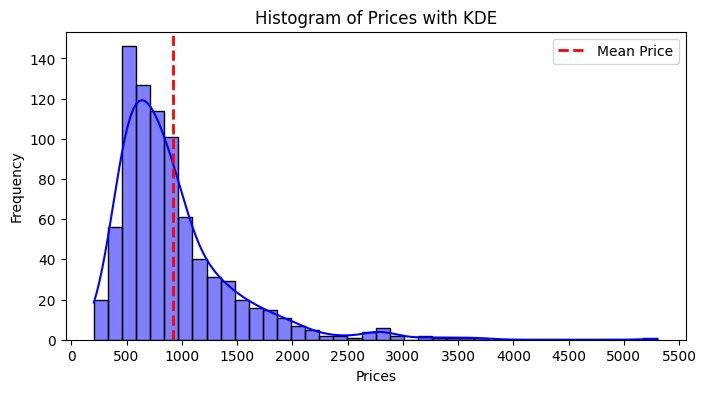

The mean price for all laptops is: 920.94


In [12]:
#Price Histogram
prices = df['Price']

# Create a histogram for the 'prices' variable
plt.figure(figsize=(8, 4))
sns.histplot(prices, bins=40, color='blue', kde=True)  # Using seaborn for histogram and KDE
plt.title('Histogram of Prices with KDE')
plt.xlabel('Prices')
plt.ylabel('Frequency')

# Add a vertical line for the mean of prices
plt.axvline(prices.mean(), color='red', linestyle='dashed', linewidth=2, label='Mean Price')

# Add tick marks at every 500 on the x-axis
plt.xticks(range(0, int(prices.max()) + 500, 500))

plt.legend()  # Display legend for the line
plt.show()

# Print the mean price
print('The mean price for all laptops is: {:.2f}'.format(prices.mean()))

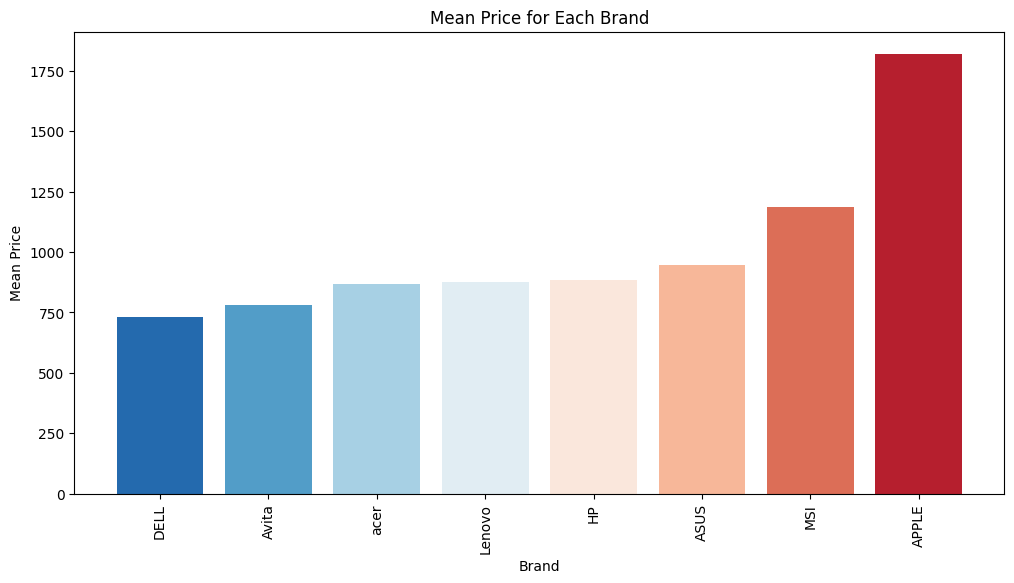

In [13]:
#Price Histogram
mean_prices_by_brand = df.groupby('brand')['Price'].mean()
mean_prices_by_brand = mean_prices_by_brand.sort_values()

blue_to_red_palette = sns.color_palette("RdBu_r", n_colors=len(mean_prices_by_brand))
plt.figure(figsize=(12, 6))
plt.bar(mean_prices_by_brand.index, mean_prices_by_brand, color=blue_to_red_palette)
plt.xlabel('Brand')
plt.ylabel('Mean Price')
plt.title('Mean Price for Each Brand')
plt.xticks(rotation=90)
plt.show()

In [14]:
df.columns

Index(['brand', 'processor_brand', 'processor_name', 'processor_gnrtn',
       'ram_gb', 'ram_type', 'ssd', 'hdd', 'os', 'os_bit', 'graphic_card_gb',
       'weight', 'warranty', 'Touchscreen', 'msoffice', 'Price', 'rating',
       'Number of Ratings', 'Number of Reviews'],
      dtype='object')

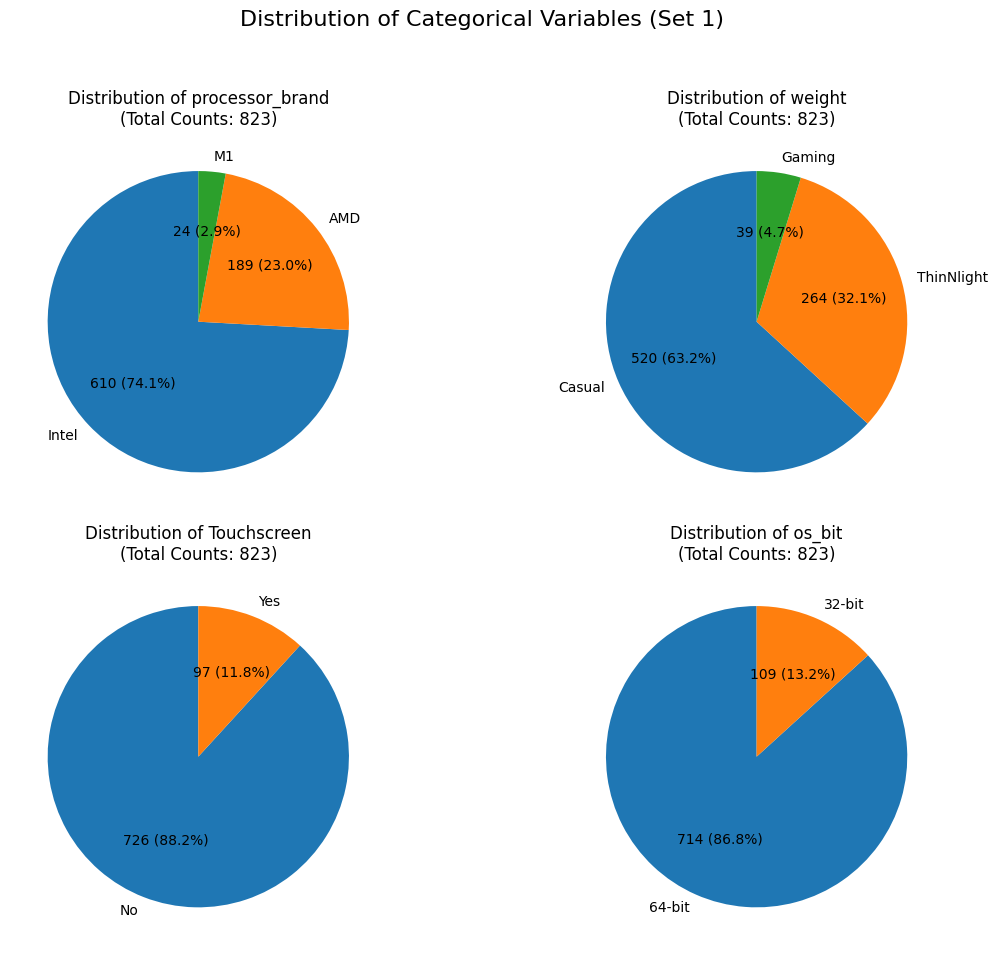

In [15]:
# Categorical Variables Pie Charts with Counts and Percentages
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Distribution of Categorical Variables (Set 1)', fontsize=16)

axes = axes.flatten()

variables_set1 = ['processor_brand', 'weight', 'Touchscreen', 'os_bit']

for i, variable in enumerate(variables_set1):
    values_counts = df[variable].value_counts()
    labels = values_counts.index
    sizes = values_counts.values
    axes[i].pie(sizes, labels=labels, autopct=lambda p: '{:.0f} ({:.1f}%)'.format(p * sum(sizes) / 100, p), startangle=90)
    axes[i].set_title(f'Distribution of {variable}\n(Total Counts: {sum(sizes)})')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

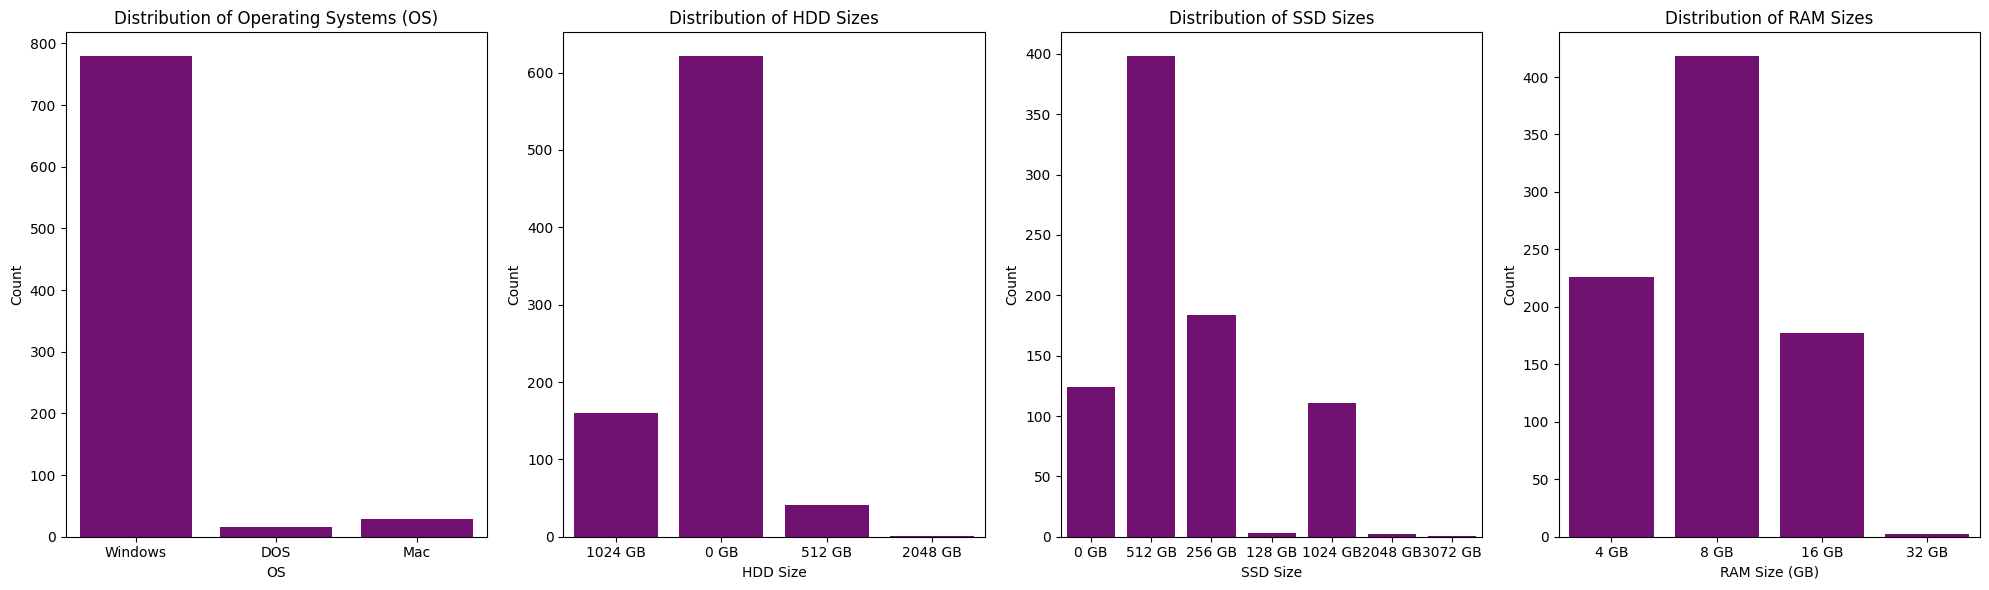

In [16]:
# Other Categorical Variable Bar Charts

custom_palette = ["purple", "yellow", "red"]
sns.set_palette(custom_palette)

# Create subplots
fig, axes = plt.subplots(1, 4, figsize=(20, 6))

# Bar chart for 'os'
sns.countplot(x='os', data=df, ax=axes[0])
axes[0].set_title('Distribution of Operating Systems (OS)')
axes[0].set_xlabel('OS')
axes[0].set_ylabel('Count')

# Bar chart for 'hdd'
sns.countplot(x='hdd', data=df, ax=axes[1])
axes[1].set_title('Distribution of HDD Sizes')
axes[1].set_xlabel('HDD Size')
axes[1].set_ylabel('Count')

# Bar chart for 'ssd'
sns.countplot(x='ssd', data=df, ax=axes[2])
axes[2].set_title('Distribution of SSD Sizes')
axes[2].set_xlabel('SSD Size')
axes[2].set_ylabel('Count')

# Bar chart for 'ram_gb'
sns.countplot(x='ram_gb', data=df, ax=axes[3])
axes[3].set_title('Distribution of RAM Sizes')
axes[3].set_xlabel('RAM Size (GB)')
axes[3].set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()

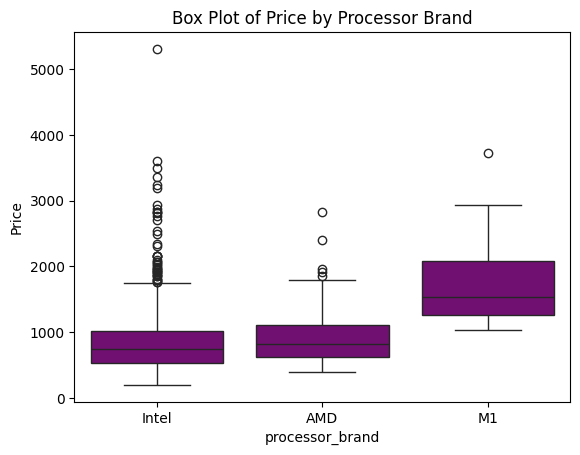

In [17]:
# Processor Brand-Price Box Plots

sns.boxplot(x='processor_brand', y='Price', data=df)
plt.title('Box Plot of Price by Processor Brand')
plt.show()

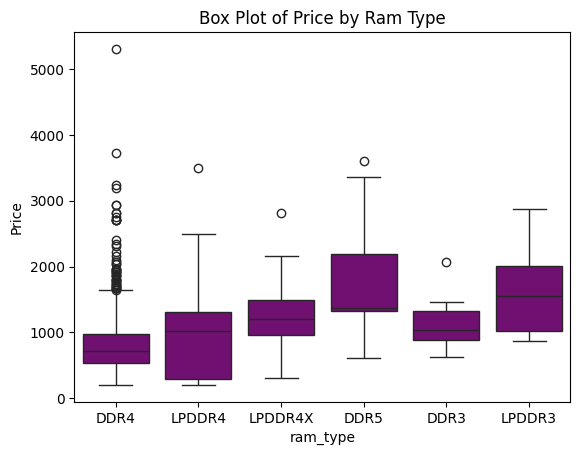

In [18]:
# Ram Type-Price Box Plots

sns.boxplot(x='ram_type', y='Price', data=df)
plt.title('Box Plot of Price by Ram Type')
plt.show()

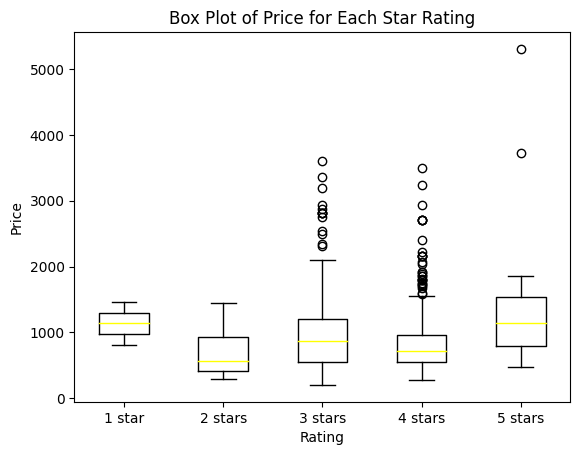

Mean Price for Each Star Rating:
rating
1 star     1139.88
2 stars     708.65
3 stars     978.49
4 stars     857.72
5 stars    1501.34
Name: Price, dtype: float64
<bound method Series.to_frame of rating
4 stars    444
3 stars    352
5 stars     16
2 stars      9
1 star       2
Name: count, dtype: int64>


In [19]:
# Rating-Price Box Plots
plt.boxplot([df[df['rating'] == star]['Price'] for star in sorted(df['rating'].unique())],
            labels=sorted(df['rating'].unique()))
plt.xlabel('Rating')
plt.ylabel('Price')
plt.title('Box Plot of Price for Each Star Rating')
plt.show()

mean_prices = df.groupby('rating')['Price'].mean()

print("Mean Price for Each Star Rating:")
print(mean_prices.round(2))
print(df['rating'].value_counts().to_frame)

In [20]:
df.columns

Index(['brand', 'processor_brand', 'processor_name', 'processor_gnrtn',
       'ram_gb', 'ram_type', 'ssd', 'hdd', 'os', 'os_bit', 'graphic_card_gb',
       'weight', 'warranty', 'Touchscreen', 'msoffice', 'Price', 'rating',
       'Number of Ratings', 'Number of Reviews'],
      dtype='object')

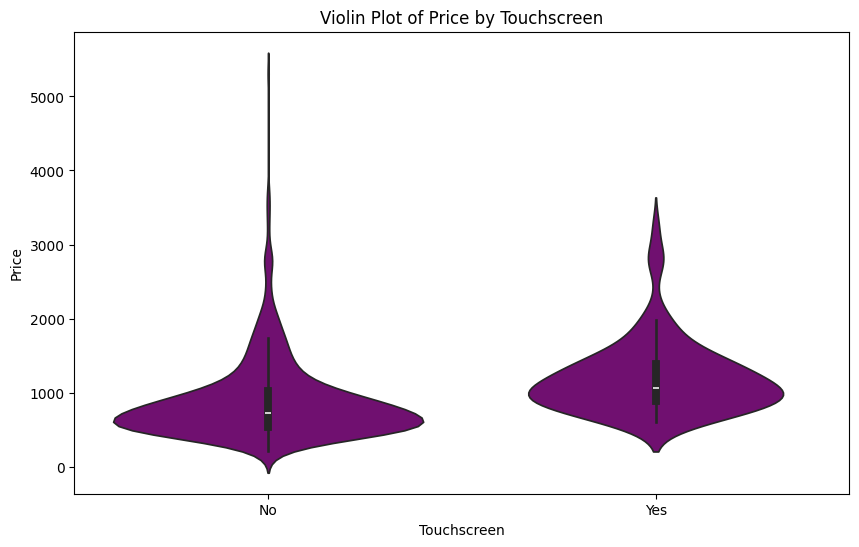

Median Price of Laptops with Touchscreen: $1061.86
Median Price of Laptops without Touchscreen: $727.08
Mean Price of Laptops with Touchscreen: $1200.81
Mean Price of Laptops without Touchscreen: $883.55


In [21]:
# Touchscreen Price Violin Plots

plt.figure(figsize=(10, 6))

sns.violinplot(x='Touchscreen', y='Price', data=df)
plt.title('Violin Plot of Price by Touchscreen')
plt.show()

median_price_by_touchscreen = df.groupby('Touchscreen')['Price'].median()
average_price_by_touchscreen = df.groupby('Touchscreen')['Price'].mean()

print("Median Price of Laptops with Touchscreen: ${:.2f}".format(median_price_by_touchscreen[1]))
print("Median Price of Laptops without Touchscreen: ${:.2f}".format(median_price_by_touchscreen[0]))
print("Mean Price of Laptops with Touchscreen: ${:.2f}".format(average_price_by_touchscreen[1]))
print("Mean Price of Laptops without Touchscreen: ${:.2f}".format(average_price_by_touchscreen[0]))

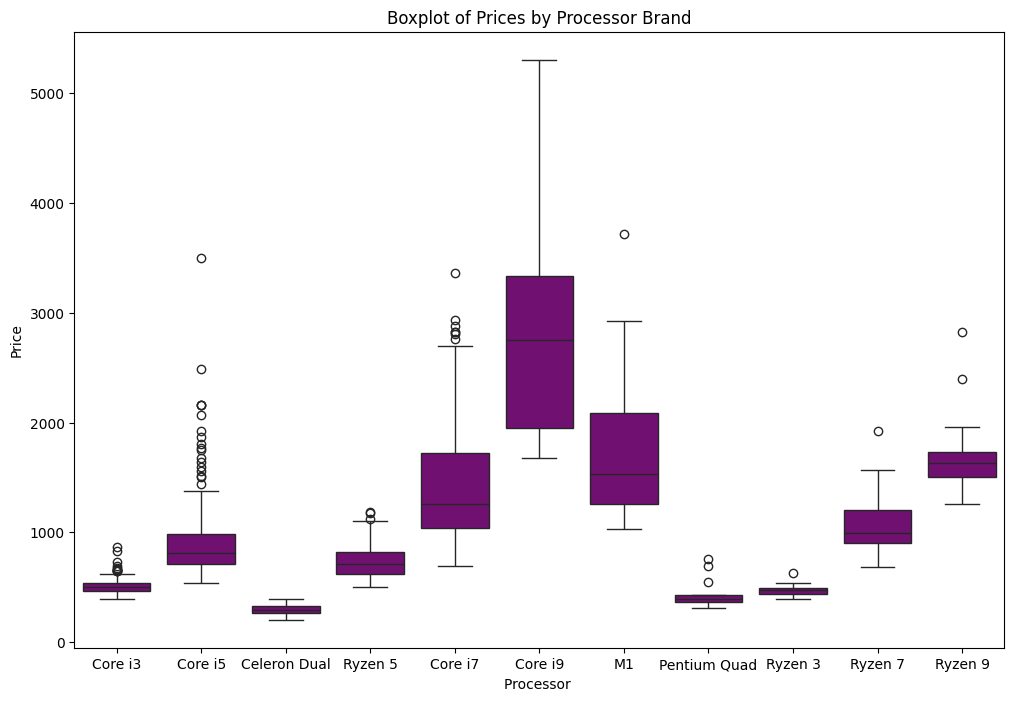

In [22]:
#Processor Brand-Price Box Plots
plt.figure(figsize=(12, 8))

sns.boxplot(x='processor_name', y='Price', data=df)
plt.title('Boxplot of Prices by Processor Brand')
plt.xlabel('Processor ')
plt.ylabel('Price')
plt.show()

<ipython-input-23-22598a04505e>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='ram_type', y='Price', hue='ram_gb', data=df, ci=None, palette='viridis', order=ram_type_order)


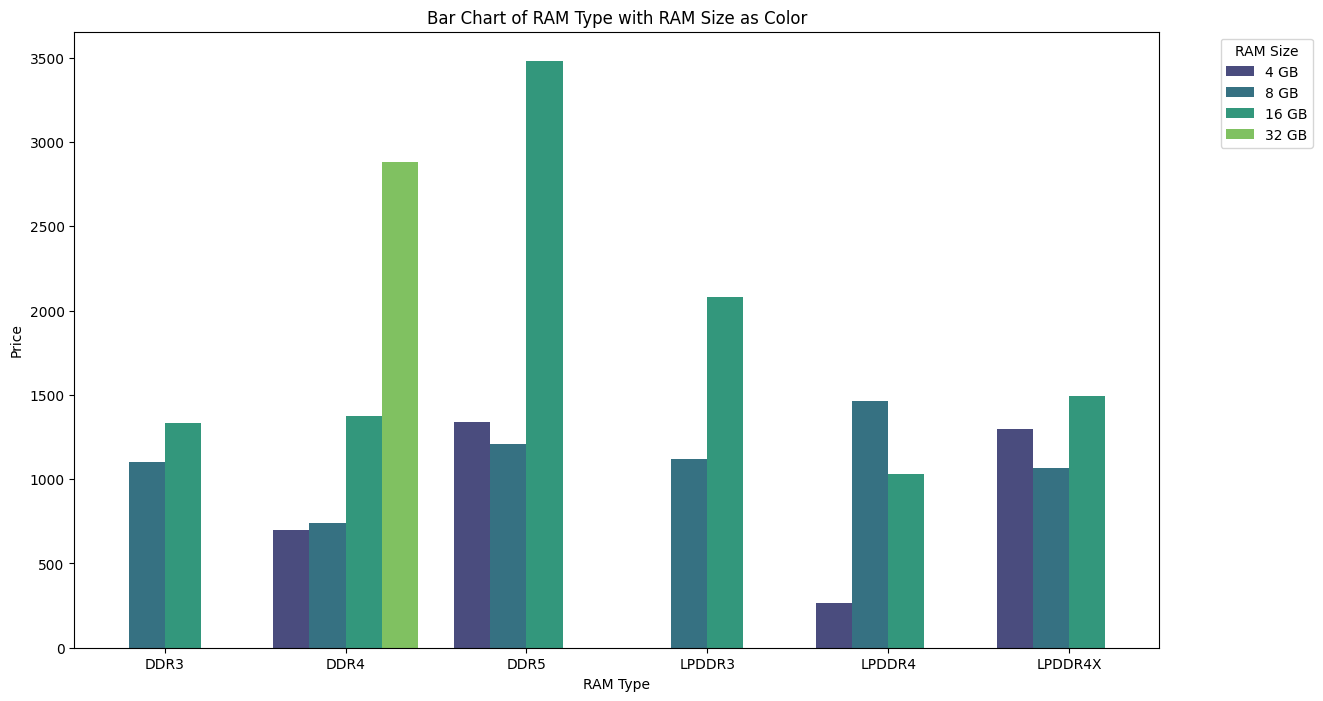

In [23]:
#Ram Type-Size-Price Bar Charts
plt.figure(figsize=(14, 8))

ram_type_order = sorted(df['ram_type'].unique())

sns.barplot(x='ram_type', y='Price', hue='ram_gb', data=df, ci=None, palette='viridis', order=ram_type_order)
plt.title('Bar Chart of RAM Type with RAM Size as Color')
plt.xlabel('RAM Type')
plt.ylabel('Price')
plt.legend(title='RAM Size', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move the legend to the side
plt.show()

In [24]:
#Multiple Linear Regression

In [25]:
categorical_variables = [feature for feature in df.columns if df[feature].dtype == 'object']

In [26]:
#Perform one-hot encoding on categorical variables
df_dummies = pd.get_dummies(df, columns=categorical_variables)

In [27]:
df_dummies.head()

,Price,Number of Ratings,Number of Reviews,brand_APPLE,brand_ASUS,brand_Avita,brand_DELL,brand_HP,brand_Lenovo,brand_MSI,...,warranty_No warranty,Touchscreen_No,Touchscreen_Yes,msoffice_No,msoffice_Yes,rating_1 star,rating_2 stars,rating_3 stars,rating_4 stars,rating_5 stars
0,415.788,3,0,False,True,False,False,False,False,False,...,True,True,False,True,False,False,True,False,False,False
1,467.988,65,5,False,False,False,False,False,True,False,...,True,True,False,True,False,False,False,True,False,False
2,479.988,8,1,False,False,False,False,False,True,False,...,True,True,False,True,False,False,False,True,False,False
3,839.880,0,0,False,True,False,False,False,False,False,...,True,True,False,True,False,False,False,True,False,False
4,323.880,0,0,False,True,False,False,False,False,False,...,True,True,False,True,False,False,False,True,False,False


In [28]:
# drop 'Price' column
X = df_dummies.drop('Price', axis=1)
# the column to be predicted
y = df_dummies['Price']

In [29]:
# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# initialize the model
model = LinearRegression()

In [30]:
# train the model
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [31]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"MSE: {mse}, RMSE: {rmse}")

MSE: 83003.05658167628, RMSE: 288.1025105438623


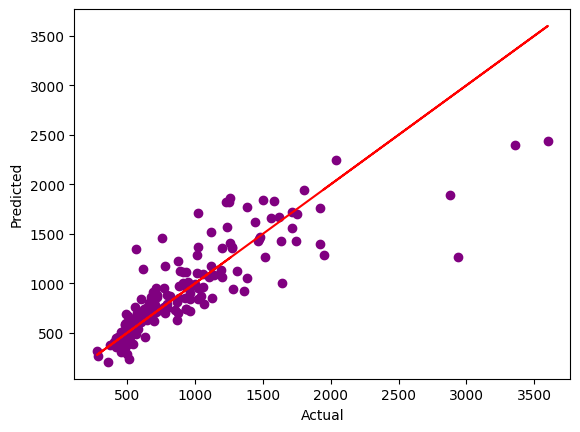

In [32]:
#Visualize MLR-trained model
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Plotting the identity line
plt.plot(y_test, y_test, color='red')
plt.show()

In [33]:
#Evaluation of MLR Model
print("R^2 on training data ",model.score(X_train, y_train))
print("R^2 on testing data ",model.score(X_test,y_test))

R^2 on training data  0.8389007197944695
R^2 on testing data  0.7042241051300115


The mean of the predicted price is: $932.16


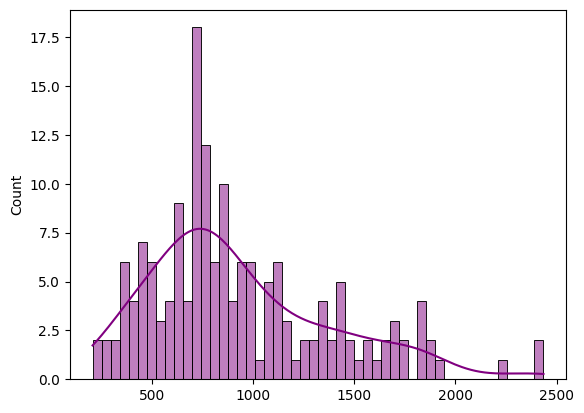

In [34]:
sns.histplot(x=(y_pred), kde=True, bins=50);

mean_predicted_value = np.mean(y_pred)

print(f"The mean of the predicted price is: ${mean_predicted_value:.2f}".format())

In [35]:
# Initialize Ridge Regression model
ridge_model = Ridge(random_state=42)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
r2_ridge = ridge_model.score(X_test, y_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)

# Initialize Lasso Regression model
lasso_model = Lasso(random_state=42)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
r2_lasso = lasso_model.score(X_test, y_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)

# Initialize Decision Tree Regressor model
decision_tree_model = DecisionTreeRegressor(random_state=42)
decision_tree_model.fit(X_train, y_train)
y_pred_decision_tree = decision_tree_model.predict(X_test)
r2_decision_tree = decision_tree_model.score(X_test, y_test)
mse_decision_tree = mean_squared_error(y_test, y_pred_decision_tree)
rmse_decision_tree = np.sqrt(mse_decision_tree)

# Initialize Gradient Boosting Regressor model
gradient_boosting_model = GradientBoostingRegressor(random_state=42)
gradient_boosting_model.fit(X_train, y_train)
y_pred_gradient_boosting = gradient_boosting_model.predict(X_test)
r2_gradient_boosting = gradient_boosting_model.score(X_test, y_test)
mse_gradient_boosting = mean_squared_error(y_test, y_pred_gradient_boosting)
rmse_gradient_boosting = np.sqrt(mse_gradient_boosting)

# Initialize XGBoost Regressor model
xgboost_model = XGBRegressor(random_state=42)
xgboost_model.fit(X_train, y_train)
y_pred_xgboost = xgboost_model.predict(X_test)
r2_xgboost = xgboost_model.score(X_test, y_test)
mse_xgboost = mean_squared_error(y_test, y_pred_xgboost)
rmse_xgboost = np.sqrt(mse_xgboost)

In [36]:
model_names = ['Ridge', 'Lasso', 'Decision Tree', 'Gradient Boosting', 'XGBoost']

# List of models and their corresponding metrics
models = [
    {'R-squared': r2_ridge, 'MSE': mse_ridge, 'RMSE': rmse_ridge},
    {'R-squared': r2_lasso, 'MSE': mse_lasso, 'RMSE': rmse_lasso},
    {'R-squared': r2_decision_tree, 'MSE': mse_decision_tree, 'RMSE': rmse_decision_tree},
    {'R-squared': r2_gradient_boosting, 'MSE': mse_gradient_boosting, 'RMSE': rmse_gradient_boosting},
    {'R-squared': r2_xgboost, 'MSE': mse_xgboost, 'RMSE': rmse_xgboost},
]

# Create a DataFrame
df_metrics = pd.DataFrame(models, index=model_names)

df_metrics

,R-squared,MSE,RMSE
Ridge,0.711714,80901.096392,284.431180
Lasso,0.708556,81787.348718,285.984875
Decision Tree,0.390535,171032.931640,413.561279
Gradient Boosting,0.688305,87470.327405,295.753829
XGBoost,0.732009,75205.724512,274.236621


In [37]:
#XGBOOST MODEL EVALUATION

In [38]:
# Hyperparameter Tuning

# Define the XGBoost regressor
xgboost_model = XGBRegressor()

# Define the hyperparameters and their possible values
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0]
}

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=xgboost_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Train the model with the best parameters
best_xgboost_model = XGBRegressor(**best_params)
best_xgboost_model.fit(X_train, y_train)

# Predict on the test set
y_pred = best_xgboost_model.predict(X_test)

In [39]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Best Hyperparameters:", best_params)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}
Mean Squared Error: 69458.30218534225
Root Mean Squared Error: 263.5494302504603
R-squared: 0.7524899403577507


Top 10 Most Important Features:
                   Feature  Importance
43             ssd_1024 GB    0.134226
55              os_Windows    0.119231
17  processor_name_Core i9    0.096546
32            ram_gb_16 GB    0.093529
24    processor_gnrtn_10th    0.040240
16  processor_name_Core i7    0.035139
11   processor_brand_Intel    0.028864
37           ram_type_DDR4    0.026838
48              ssd_512 GB    0.026264
15  processor_name_Core i5    0.024262


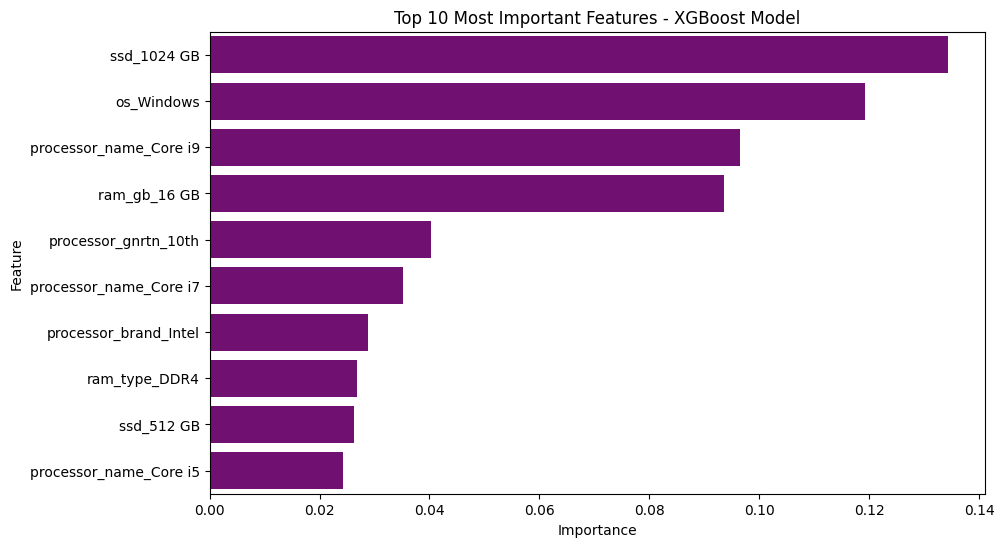

In [40]:
# Get the top 10 feature importances from the trained XGBoost model
feature_importances = best_xgboost_model.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

top_features = feature_importance_df.head(10)

print("Top 10 Most Important Features:")
print(top_features)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_features)
plt.title('Top 10 Most Important Features - XGBoost Model')
plt.show()